#RevoU Bank Credit Card Project

#1. Business Objective
1.   Increase Credit Card Usage: Encourage existing customers to use RevoBank's credit card products more frequently.
2.   Summarize Sales Performance: Analyze and report on sales data from the past
3. Develop User Personas: Create customer profiles to better understand and target client segments.
4. Enable Data-Driven Decisions: Use data analytics to guide strategic business decisions.




#2. The Code

##2.1 Importing Libraries and Data
Installing gdown for using database from drive. To prepare for data cleaning in Python, you need to install Pandas for data manipulation, NumPy for numerical operations, and utilize the built-in datetime module for handling date and time data, as it is included in Python's standard library.

In [ ]:
import pandas as pd

import gdown

import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import shapiro, skew

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn import cluster

from yellowbrick.cluster import SilhouetteVisualizer

import plotly.express as px

In [ ]:
!pip install gdown

In [ ]:
!pip install plotly

##2.2 Deploying the datasets
Importing CSV from gdrive in Python.

In [ ]:
# load sales_data.csv as df1
sales_url = 'https://drive.google.com/file/d/1dXE7wrsL37LhWl962gqluv6ZOuEnn_zG/view'
customers = 'https://drive.google.com/uc?id='+ sales_url.split('/')[-2]
df1 = pd.read_csv(customers)
df1.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13


In [ ]:
# Users dataset Overview for Understanding
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12559 non-null  int64  
 1   account_activity_level   12559 non-null  object 
 2   customer_value_level     12559 non-null  object 
 3   MOB                      12559 non-null  float64
 4   flag_female              12559 non-null  int64  
 5   avg_sales_L36M           11820 non-null  float64
 6   cnt_sales_L36M           12559 non-null  int64  
 7   last_sales               12559 non-null  float64
 8   month_since_last_sales   12559 non-null  int64  
 9   count_direct_promo_L12M  12559 non-null  int64  
 10  birth_date               12559 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
# Make a copy of the original data for before data cleaning
df_customers_dc = df1.copy()

##2.3 Change Datatypes
I handling data types to first simplifies data manipulation and analysis in Python, ensuring that operations are executed efficiently and accurately according to the nature of the data.

In [ ]:
# Change account_id data type into string
df_customers_dc['account_id'] = df_customers_dc['account_id'].astype(str)

In [ ]:
# Change MOB data type into int
df_customers_dc[['MOB']] = df_customers_dc[['MOB']].astype(int)

In [ ]:
# Change date data type into date
df_customers_dc['birth_date'] = pd.to_datetime(df_customers_dc['birth_date'])

In [ ]:
#Check the data type of id after converted
df_customers_dc.dtypes

,0
account_id,object
account_activity_level,object
customer_value_level,object
MOB,int64
flag_female,int64
avg_sales_L36M,float64
cnt_sales_L36M,int64
last_sales,float64
month_since_last_sales,int64
count_direct_promo_L12M,int64


##2.4 Checking Unique Value

In [ ]:
# Check unique data in categorical columns
for column in df_customers_dc.select_dtypes(include=['object']).columns:
  num_unique = df_customers_dc[column].nunique()
  print(f"Number of unique '{column}' is {num_unique}")

Number of unique 'account_id' is 12487
Number of unique 'account_activity_level' is 4
Number of unique 'customer_value_level' is 6


In [ ]:
# Count the values
list_obj = ['account_activity_level','customer_value_level','count_direct_promo_L12M']

for i in list_obj:
    unique_data = df_customers_dc[i].value_counts()
    print(unique_data.to_markdown(), '\n\n')

| account_activity_level   |   count |
|:-------------------------|--------:|
| X                        |    8238 |
| Z                        |    3442 |
| Y                        |     878 |
| XYZ                      |       1 | 


| customer_value_level   |   count |
|:-----------------------|--------:|
| E                      |    4480 |
| B                      |    2390 |
| A                      |    2204 |
| C                      |    2003 |
| D                      |    1481 |
| F                      |       1 | 


|   count_direct_promo_L12M |   count |
|--------------------------:|--------:|
|                         6 |    4271 |
|                         5 |    3117 |
|                         4 |    2441 |
|                         3 |    1274 |
|                         7 |     970 |
|                         2 |     218 |
|                         8 |     104 |
|                         9 |      46 |
|                         1 |      40 |
|                       

##2.5 Excluding XYZ and F the Unique Values
Excluding unique values from the data is essential to eliminate outliers or erroneous entries that could skew analysis and lead to inaccurate insights.

In [ ]:
#Excluding XYZ
df_customers_dc = df_customers_dc[df_customers_dc['account_activity_level']!='XYZ']

In [ ]:
# To confirm the changes after fixing the typos
df_customers_dc['account_activity_level'].value_counts().reset_index()

,account_activity_level,count
0,X,8238
1,Z,3442
2,Y,878


In [ ]:
#Excluding F
df_customers_dc = df_customers_dc[df_customers_dc['customer_value_level']!='F']

In [ ]:
# To confirm the changes after fixing the typos
df_customers_dc['customer_value_level'].value_counts().reset_index()

,customer_value_level,count
0,E,4480
1,B,2390
2,A,2204
3,C,2003
4,D,1480


##2.6 Handling Missing Value and Duplicated
Handling missing values and duplicates is crucial to maintain data integrity and ensure accurate analysis, as they can distort results and lead to misleading conclusions.

###2.6.1 Missing Value Handling


In [ ]:
# Number of missing values in each column
df_customers_dc.isnull().sum()

,0
account_id,0
account_activity_level,0
customer_value_level,0
MOB,0
flag_female,0
avg_sales_L36M,738
cnt_sales_L36M,0
last_sales,0
month_since_last_sales,0
count_direct_promo_L12M,0


In [ ]:
# Replace missing values
df_customers_dc['avg_sales_L36M'].fillna(0, inplace=True)

In [ ]:
# Confirm whether null data still exist
missing_values_count = df_customers_dc['avg_sales_L36M'].isnull().sum()
print(f'Missing values in avg_sales_L36M after replacement: {missing_values_count}')

Missing values in avg_sales_L36M after replacement: 0


In [ ]:
df_customers_dc.isnull().sum()

,0
account_id,0
account_activity_level,0
customer_value_level,0
MOB,0
flag_female,0
avg_sales_L36M,0
cnt_sales_L36M,0
last_sales,0
month_since_last_sales,0
count_direct_promo_L12M,0


###2.6.2 Duplicated Data

In [ ]:
# Check the duplicated
df_customers_dc[df_customers_dc['account_id'].duplicated()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
146,100013585,X,E,45,1,20000.0,3,20000.0,22,6,1978-11-13
385,100032321,Z,D,21,0,15000.0,1,15000.0,21,3,1946-12-25
569,100046628,X,E,41,1,9170.0,6,10000.0,15,6,1959-09-08
698,100056011,Z,E,17,1,20000.0,1,20000.0,17,5,1960-07-03
970,100077493,Z,C,24,1,20000.0,1,20000.0,24,3,1985-05-20
...,...,...,...,...,...,...,...,...,...,...,...
12023,101015216,X,E,33,1,8250.0,4,10000.0,18,6,1959-12-13
12066,101018108,X,E,125,1,5220.0,9,5000.0,15,6,1954-10-09
12252,101034135,X,B,131,1,10000.0,3,10000.0,16,6,1947-05-29
12326,101040513,X,C,29,1,9000.0,5,10000.0,16,7,1972-06-30


In [ ]:
# Exclude the duplicate
df_customers_dc.drop_duplicates('account_id', keep = 'first', inplace = True)

In [ ]:
# Check the data we have
df_customers_dc.shape
print('Number of rows is: ', df_customers_dc.shape[0])

Number of rows is:  12485


##2.7 Removing Client age Under 21

Removing customers under the age of 21 from RevoBank's credit card products is necessary to comply with legal age requirements for credit eligibility and to mitigate financial risk associated with younger, less experienced borrowers.

In [ ]:
#Formulas of Age
cutoff_date = pd.Timestamp('2023-05-31')
df_customers_dc['Age'] = round((cutoff_date - df_customers_dc['birth_date']).dt.days / 365.25
)
df_customers_dc

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,Age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,27.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,26.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12554,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,53.0
12555,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,71.0
12556,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,42.0
12557,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,48.0


In [ ]:
#Excluding the Underage
df_under_21 = df_customers_dc[df_customers_dc['Age'] < 21]
df_under_21

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,Age
56,100005335,Z,A,21,1,15000.0,1,15000.0,21,3,2004-06-12,19.0
156,100014578,Z,E,18,1,25000.0,1,25000.0,18,5,2006-07-27,17.0
346,100029092,X,C,123,1,10000.0,1,10000.0,19,3,2006-12-14,16.0
476,100038815,X,A,69,0,5750.0,4,5000.0,18,6,2006-07-12,17.0
479,100038963,X,A,129,1,25000.0,2,25000.0,18,6,2005-11-25,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12016,101014936,Z,B,25,1,25000.0,2,25000.0,25,5,2004-08-27,19.0
12140,101024325,X,A,120,1,9330.0,4,10000.0,24,6,2005-02-11,18.0
12165,101026926,X,E,128,1,10000.0,3,10000.0,16,5,2005-12-06,17.0
12178,101028507,Z,E,55,0,0.0,0,15000.0,55,3,2005-02-03,18.0


In [ ]:
#The Legal Customers
df_customers_dc = df_customers_dc[df_customers_dc['Age']>= 21]
print(df_customers_dc)

      account_id account_activity_level customer_value_level  MOB  \
0      100000006                      X                    A   91   
1      100000038                      X                    A   69   
2      100000382                      X                    A  123   
3      100000612                      X                    A   84   
4      100000757                      X                    A   40   
...          ...                    ...                  ...  ...   
12554  101059900                      Z                    E   21   
12555  101059915                      Z                    E   19   
12556  101059935                      Z                    E   21   
12557  101059941                      Z                    E   17   
12558  101060006                      Z                    E   21   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0     

In [ ]:
df_customers_dc['Age'].value_counts().reset_index()

,Age,count
0,69.0,502
1,67.0,498
2,66.0,476
3,71.0,469
4,70.0,443
5,68.0,431
6,72.0,414
7,75.0,407
8,73.0,384
9,74.0,361


#3. Descriptive Statistics, Insight and Recomendations

##3.1 The total sales in the last 3 years

In [ ]:
# Calculate total sales for each account
df_customers_dc['total_sales'] = df_customers_dc['avg_sales_L36M'] * df_customers_dc['cnt_sales_L36M']

# Calculate overall total sales in the last 3 years
overall_total_sales = df_customers_dc['total_sales'].sum()
print(f'Total Sales in the Last 3 Years: ${overall_total_sales:.2f}')

Total Sales in the Last 3 Years: $402603860.00


##3.2 Identify the number of clients with no sales in the past 36 months

In [ ]:
# Create a new column indicating whether clients have sales or not
df_customers_dc['has_sales'] = np.where(df_customers_dc['total_sales'] > 0, 'Yes', 'No')

# Identify clients with no sales (where total_sales is zero)
clients_no_sales = df_customers_dc.loc[df_customers_dc['total_sales'] == 0]

# Count number of clients with no sales
num_clients_no_sales = clients_no_sales.shape[0]
print(f'Number of Clients with No Sales: {num_clients_no_sales}')

# Calculate total number of clients
total_clients = df_customers_dc.shape[0]

# Calculate percentage of clients with no sales
percentage_no_sales = (num_clients_no_sales / total_clients) * 100
print(f'Percentage of Clients with No Sales: {percentage_no_sales:.2f}%')

Number of Clients with No Sales: 752
Percentage of Clients with No Sales: 6.09%


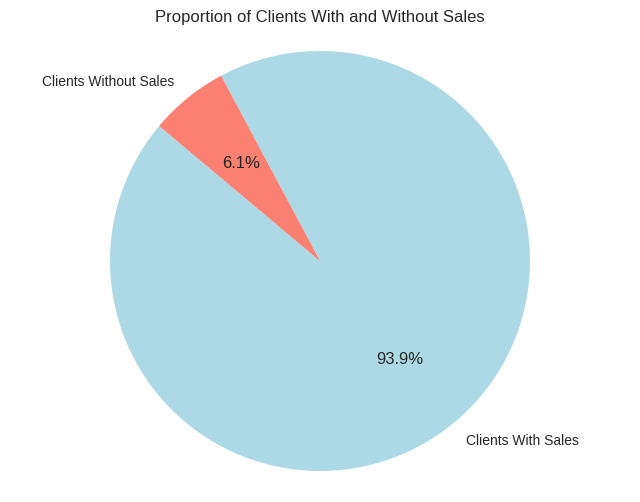

In [ ]:
# Prepare data for pie chart visualization
labels = ['Clients With Sales', 'Clients Without Sales']
sizes = [total_clients - num_clients_no_sales, num_clients_no_sales]
colors = ['lightblue', 'salmon']

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Clients With and Without Sales')
plt.axis('equal') # Equal aspect ratio ensures that pie chart is circular.
plt.show()

##3.3 The account activity with the most active transacting

In [ ]:
# Group by account activity level and calculate median months since last transaction
activity_summary = df_customers_dc.groupby('account_activity_level').agg(
    median_months_since_last_transaction=('month_since_last_sales', 'median'),
    avg_transactions=('cnt_sales_L36M', 'mean')
).reset_index()

# Display summary statistics for verification
print(activity_summary)

  account_activity_level  median_months_since_last_transaction  \
0                      X                                  18.0   
1                      Y                                  18.0   
2                      Z                                  19.0   

   avg_transactions  
0          3.284143  
1          2.339471  
2          1.227781  


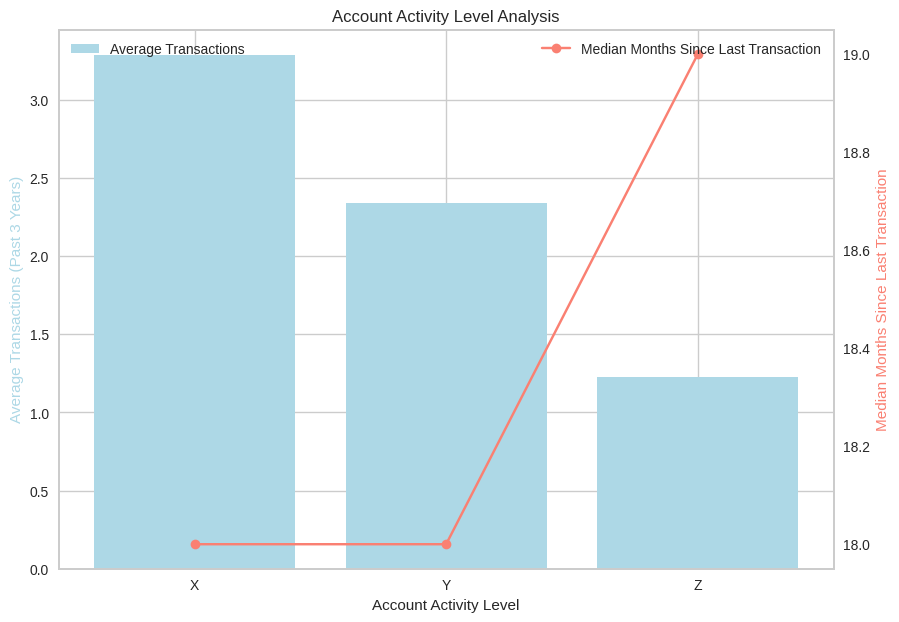

In [ ]:
# Set up figure with subplots for better visualization
fig, ax1 = plt.subplots(figsize=(10, 7))

# Create bar chart for average transactions per account activity level
ax1.bar(activity_summary['account_activity_level'],
         activity_summary['avg_transactions'],
         color='lightblue', label='Average Transactions')

# Create a second y-axis to plot median months since last transaction
ax2 = ax1.twinx()
ax2.plot(activity_summary['account_activity_level'],
         activity_summary['median_months_since_last_transaction'],
         color='salmon', marker='o', label='Median Months Since Last Transaction')

# Adding titles and labels
ax1.set_title('Account Activity Level Analysis')
ax1.set_xlabel('Account Activity Level')
ax1.set_ylabel('Average Transactions (Past 3 Years)', color='lightblue')
ax2.set_ylabel('Median Months Since Last Transaction', color='salmon')

# Add legends to distinguish between two datasets plotted on different axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust grid settings for better visibility
ax2.grid(False)  # Disable grid lines on secondary axis (line plot)

plt.show()

##3.4 Gender Profit Comparison

In [ ]:
# Calculate profit for each client
df_customers_dc['profit'] = df_customers_dc['total_sales'] * 0.024

# Group by gender flag and calculate average profit per client
gender_profit_comparison = df_customers_dc.groupby('flag_female')['profit'].agg(['sum', 'mean', 'median', 'std']).reset_index()
gender_profit_comparison.columns = ['Gender_Flag', 'Total_profit', 'Average_Profit', 'Median_Profit', 'Std_Dev']

# Display summary statistics for verification
print(gender_profit_comparison)

   Gender_Flag  Total_profit  Average_Profit  Median_Profit     Std_Dev
0            0    4475328.00      788.048600         660.00  522.482179
1            1    5187164.64      776.637916         695.52  494.891269


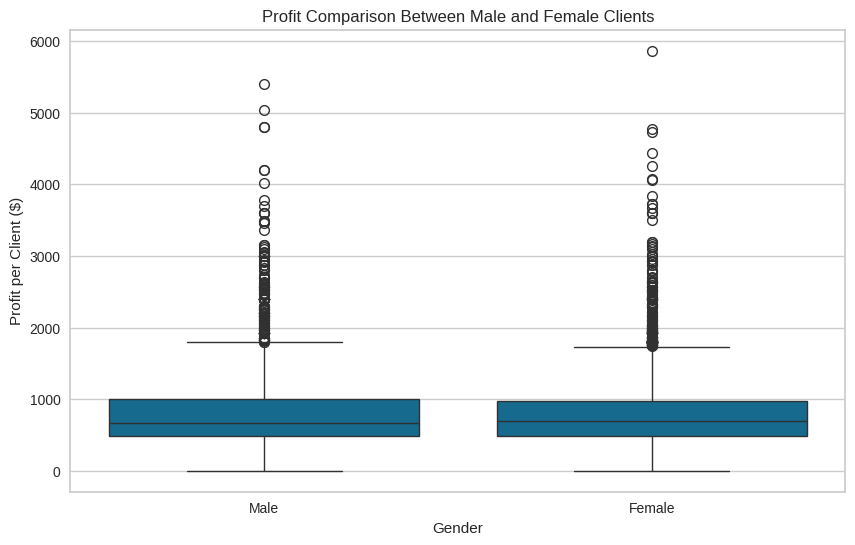

In [ ]:
# Create a new column indicating gender for better labeling in plots
df_customers_dc['Gender'] = np.where(df_customers_dc['flag_female'] == 1, 'Female', 'Male')

# Set up boxplot visualization
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='profit', data=df_customers_dc)
plt.title('Profit Comparison Between Male and Female Clients')
plt.xlabel('Gender')
plt.ylabel('Profit per Client ($)')
plt.show()

##3.5 The proportion of total sales in the past 3 years based on generations

In [ ]:
# Extract year of birth from 'birth_date' column
df_customers_dc['year_of_birth'] = df_customers_dc['birth_date'].dt.year

# Define age groups for generations
bins = [1927, 1946, 1965, 1980, 1996, 2012] # Boomer: 1928-1945; Gen-X: 1966-1980; Millennial: 1981-1996; Gen-Z: 1997-2012; Gen-Alpha: after 2012
labels = ['Boomer', 'Gen-X', 'Millennial', 'Gen-Z', 'Gen-Alpha']

# Categorize year_of_birth into generations
df_customers_dc['generation'] = pd.cut(df_customers_dc['year_of_birth'], bins=bins, labels=labels)

# Calculate total sales per generation
sales_by_generation = df_customers_dc.groupby('generation').agg(
    total_sales=('total_sales', 'sum'),
    avg_sales=('avg_sales_L36M', 'mean'),
    count_sales=('cnt_sales_L36M', 'sum')
).reset_index()

# Calculate proportion of total sales for each generation
total_overall_sales = sales_by_generation['total_sales'].sum()
sales_by_generation['proportion'] = (sales_by_generation['total_sales'] / total_overall_sales) * 100

print(sales_by_generation)

   generation  total_sales     avg_sales  count_sales  proportion
0      Boomer   10144070.0  13627.580645          888    2.519616
1       Gen-X  211415060.0  13547.182944        18207   52.511931
2  Millennial  111935250.0  15345.049824         8332   27.802826
3       Gen-Z   64030320.0  14783.380884         4933   15.904050
4   Gen-Alpha    5079160.0  12649.090909          417    1.261578


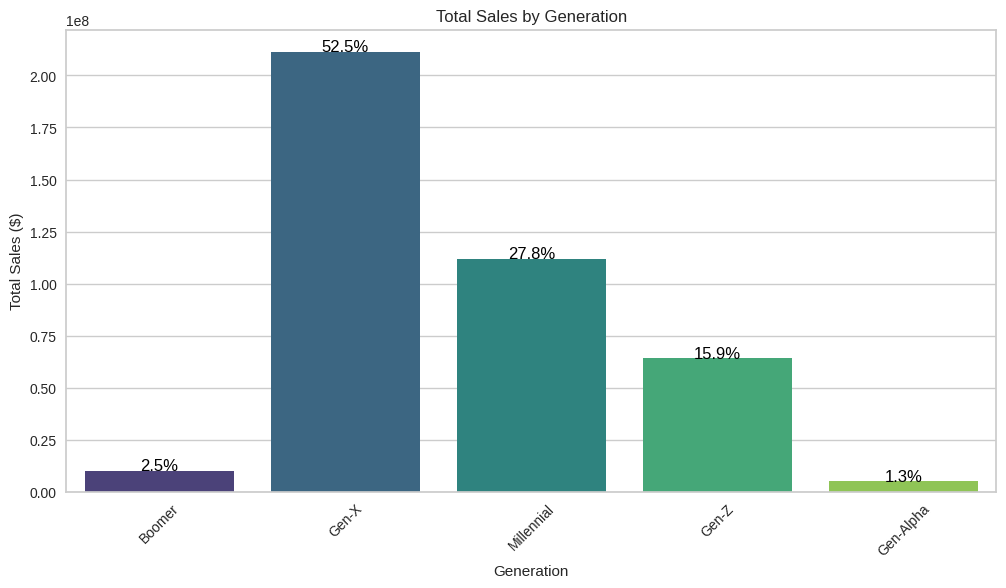

In [ ]:
plt.figure(figsize=(12,6))

# Create bar plot for Total Sales by Generation
sns.barplot(x='generation', y='total_sales', data=sales_by_generation,
            palette='viridis')

plt.title('Total Sales by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

for index in range(len(sales_by_generation)):
    plt.text(index,
             sales_by_generation.total_sales[index],
             f"{sales_by_generation.proportion[index]:.1f}%",
             color='black',
             ha="center")

plt.show()

##3.6 Relationship between increasing the number of email and SMS messages and improved total sales performance


In [ ]:
# Group by count of direct promotions received in the last year
promo_sales_analysis = df_customers_dc.groupby('count_direct_promo_L12M').agg(
    total_sales=('total_sales', 'sum'),
    num_clients=('account_id', 'count')
).reset_index()

# Calculate average sales per client for each promo communication count
promo_sales_analysis['avg_sales_per_client'] = promo_sales_analysis['total_sales'] / promo_sales_analysis['num_clients']

print(promo_sales_analysis)

    count_direct_promo_L12M  total_sales  num_clients  avg_sales_per_client
0                         0      52000.0            5          10400.000000
1                         1     207160.0           39           5311.794872
2                         2    2265330.0          214          10585.654206
3                         3   16744920.0         1252          13374.536741
4                         4   52462820.0         2411          21759.776027
5                         5   89816130.0         3064          29313.358355
6                         6  176918780.0         4200          42123.519048
7                         7   52729900.0          954          55272.431866
8                         8    5110020.0          102          50098.235294
9                         9    2077100.0           45          46157.777778
10                       10    1161540.0           24          48397.500000
11                       11    2132000.0           34          62705.882353
12          

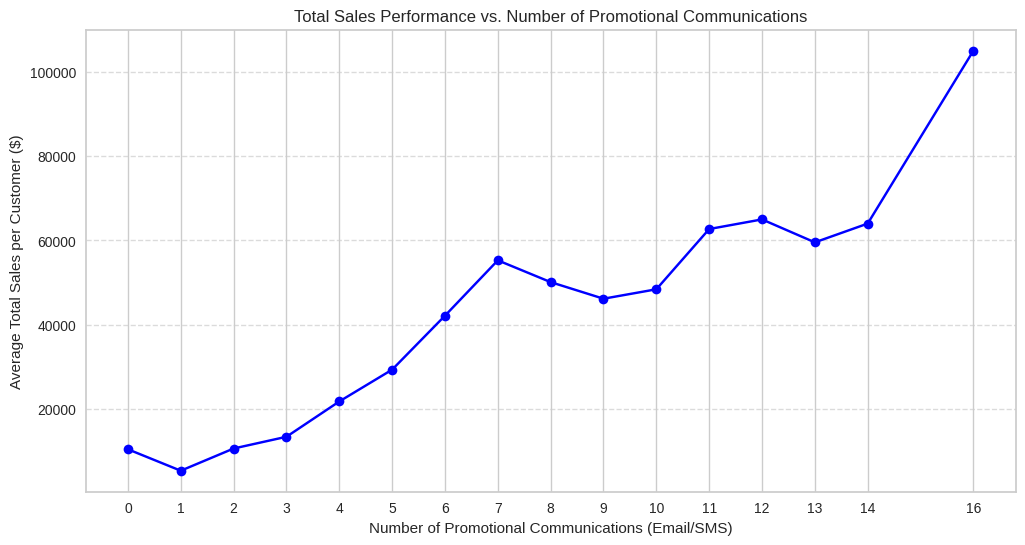

In [ ]:
# Group by promotional communication count and calculate total sales per customer
promo_sales_analysis = df_customers_dc.groupby('count_direct_promo_L12M').agg(
    total_sales_per_customer=('total_sales', 'mean')
).reset_index()

# Set up the line chart visualization
plt.figure(figsize=(12, 6))

# Create line plot for total sales per customer based on promo communication count
plt.plot(promo_sales_analysis['count_direct_promo_L12M'],
         promo_sales_analysis['total_sales_per_customer'],
         marker='o', color='blue')

# Adding titles and labels
plt.title('Total Sales Performance vs. Number of Promotional Communications')
plt.xlabel('Number of Promotional Communications (Email/SMS)')
plt.ylabel('Average Total Sales per Customer ($)')

# Adjust grid settings for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Simple horizontal grid lines only

plt.xticks(promo_sales_analysis['count_direct_promo_L12M'])  # Ensure all x-ticks are shown

plt.show()

#4. RFM

##4.1 RFM Steps

###4.1.1 Define DataFrame

In [ ]:
# Adjust column names as per your dataset
rfm = df_customers_dc[['account_id', 'month_since_last_sales', 'cnt_sales_L36M', 'total_sales']].copy()

# Rename columns for clarity in RFM context
rfm.rename(columns={
    'month_since_last_sales': 'recency',
    'cnt_sales_L36M': 'frequency',
    'total_sales': 'monetary'
}, inplace=True)

# Display first few rows to verify
print(rfm.head())

  account_id  recency  frequency  monetary
0  100000006       26          1   25000.0
1  100000038       25          5   45000.0
2  100000382       18          6  103980.0
3  100000612       14          6  154980.0
4  100000757       17          3   75000.0


###4.1.2 Creating 3D Basic Scatter

In [ ]:
# Create 3D scatter plot
fig = px.scatter_3d(
    rfm,
    x='recency',
    y='frequency',
    z='monetary',
    title='RFM Plot',
    size_max=10
)

fig.show()

###4.1.3 Labeling the RFM

In [ ]:
# Define labels for scoring
labels = [1, 2, 3, 4, 5]

# Recency: Lower recency means more recent purchase → higher score
rfm['recency_score'] = pd.qcut(rfm['recency'], q=5, labels=labels[::-1])
# Reverse labels because lower recency is better (more recent)

# Frequency: Higher frequency means better → higher score
rfm['frequency_score'] = pd.qcut(rfm['frequency'], q=5, labels=labels)

# Monetary: Higher monetary value means better → higher score
rfm['monetary_score'] = pd.qcut(rfm['monetary'], q=5, labels=labels)

###4.1.4 Checking The Percentile

In [ ]:
# For Recency
print("Recency Percentiles:")
print("20%:", rfm['recency'].quantile(0.2))
print("40%:", rfm['recency'].quantile(0.4))
print("60%:", rfm['recency'].quantile(0.6))
print("80%:", rfm['recency'].quantile(0.8))
print("100%:", rfm['recency'].max())

# For Frequency
print("\nFrequency Percentiles:")
print("20%:", rfm['frequency'].quantile(0.2))
print("40%:", rfm['frequency'].quantile(0.4))
print("60%:", rfm['frequency'].quantile(0.6))
print("80%:", rfm['frequency'].quantile(0.8))
print("100%:", rfm['frequency'].max())

# For Monetary
print("\nMonetary Percentiles:")
print("20%:", rfm['monetary'].quantile(0.2))
print("40%:", rfm['monetary'].quantile(0.4))
print("60%:", rfm['monetary'].quantile(0.6))
print("80%:", rfm['monetary'].quantile(0.8))
#print max value instead of quantiling at 1 for clarity
#printing max value is better than quantiling at 1 because it shows actual max value.

Recency Percentiles:
20%: 16.0
40%: 18.0
60%: 19.0
80%: 23.0
100%: 63

Frequency Percentiles:
20%: 1.0
40%: 2.0
60%: 3.0
80%: 4.0
100%: 15

Monetary Percentiles:
20%: 18000.0
40%: 25000.0
60%: 33000.0
80%: 50000.0


###4.1.5 Checking Distributions

In [ ]:
# Check distribution of recency after quantile binning
pd.qcut(rfm['recency'], q=5).value_counts()

,count
recency,
"(16.0, 18.0]",3679
"(2.999, 16.0]",2955
"(19.0, 23.0]",2546
"(23.0, 63.0]",2166
"(18.0, 19.0]",1012


In [ ]:
# Check distribution of frequency after quantile binning
pd.qcut(rfm['frequency'], q=5).value_counts()

,count
frequency,
"(-0.001, 1.0]",4662
"(1.0, 2.0]",2636
"(4.0, 15.0]",2141
"(2.0, 3.0]",1676
"(3.0, 4.0]",1243


In [ ]:
# Check distribution of monetary after quantile binning
pd.qcut(rfm['monetary'], q=5).value_counts()

,count
monetary,
"(18000.0, 25000.0]",3404
"(33000.0, 50000.0]",3112
"(-0.001, 18000.0]",2490
"(50000.0, 244400.0]",1790
"(25000.0, 33000.0]",1562


###4.1.6 Get Categories

In [ ]:
# Get the category intervals for recency after quantile binning
pd.qcut(rfm['recency'], q=5).cat.categories

IntervalIndex([(2.999, 16.0], (16.0, 18.0], (18.0, 19.0], (19.0, 23.0],
               (23.0, 63.0]],
              dtype='interval[float64, right]')

In [ ]:
# Similarly for frequency
pd.qcut(rfm['frequency'], q=5).cat.categories

IntervalIndex([(-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0], (4.0, 15.0]], dtype='interval[float64, right]')

In [ ]:
# And monetary
pd.qcut(rfm['monetary'], q=5).cat.categories

IntervalIndex([  (-0.001, 18000.0],  (18000.0, 25000.0],  (25000.0, 33000.0],
                (33000.0, 50000.0], (50000.0, 244400.0]],
              dtype='interval[float64, right]')

###4.1.7 Labeling

In [ ]:
pd.qcut(rfm['recency'], q=5, labels=[5,4,3,2,1])  # Recency: lower is better → higher score

,recency
0,1
1,1
2,4
3,5
4,4
...,...
12554,2
12555,3
12556,2
12557,4


In [ ]:
pd.qcut(rfm['frequency'], q=5, labels=[1,2,3,4,5])  # Frequency: higher is better → higher score

,frequency
0,1
1,5
2,5
3,5
4,3
...,...
12554,1
12555,1
12556,1
12557,2


In [ ]:
pd.qcut(rfm['monetary'], q=5, labels=[1,2,3,4,5])  # Monetary: higher is better → higher score

,monetary
0,2
1,4
2,5
3,5
4,5
...,...
12554,1
12555,2
12556,2
12557,4


###4.1.8 Assign RFM

In [ ]:
# Assign RFM scores using quantile bins with duplicates dropped where needed
rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=[5,4,3,2,1])  # Recency: lower is better → higher score
rfm['f_score'] = pd.qcut(rfm['frequency'], q=5, labels=[1,2,3,4,5])  # Frequency: higher is better → higher score
rfm['m_score'] = pd.qcut(rfm['monetary'], q=5, labels=[1,2,3,4,5])  # Monetary: higher is better → higher score
rfm

,account_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,r_score,f_score,m_score
0,100000006,26,1,25000.0,1,1,2,1,1,2
1,100000038,25,5,45000.0,1,5,4,1,5,4
2,100000382,18,6,103980.0,4,5,5,4,5,5
3,100000612,14,6,154980.0,5,5,5,5,5,5
4,100000757,17,3,75000.0,4,3,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...
12554,101059900,21,1,15000.0,2,1,1,2,1,1
12555,101059915,19,1,20000.0,3,1,2,3,1,2
12556,101059935,21,1,20000.0,2,1,2,2,1,2
12557,101059941,17,2,40000.0,4,2,4,4,2,4


###4.1.9 Combining RFM Score

In [ ]:
# Combine R, F, and M scores into one string score
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm

,account_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,r_score,f_score,m_score,rfm_score
0,100000006,26,1,25000.0,1,1,2,1,1,2,112
1,100000038,25,5,45000.0,1,5,4,1,5,4,154
2,100000382,18,6,103980.0,4,5,5,4,5,5,455
3,100000612,14,6,154980.0,5,5,5,5,5,5,555
4,100000757,17,3,75000.0,4,3,5,4,3,5,435
...,...,...,...,...,...,...,...,...,...,...,...
12554,101059900,21,1,15000.0,2,1,1,2,1,1,211
12555,101059915,19,1,20000.0,3,1,2,3,1,2,312
12556,101059935,21,1,20000.0,2,1,2,2,1,2,212
12557,101059941,17,2,40000.0,4,2,4,4,2,4,424


##4.2 Interpreting RFM Segments

###4.2.2 Value Count

In [ ]:
# Display counts of each unique RFM score
rfm['rfm_score'].value_counts()

,count
rfm_score,
111,951
212,706
412,656
512,507
424,463
...,...
115,1
551,1
114,1


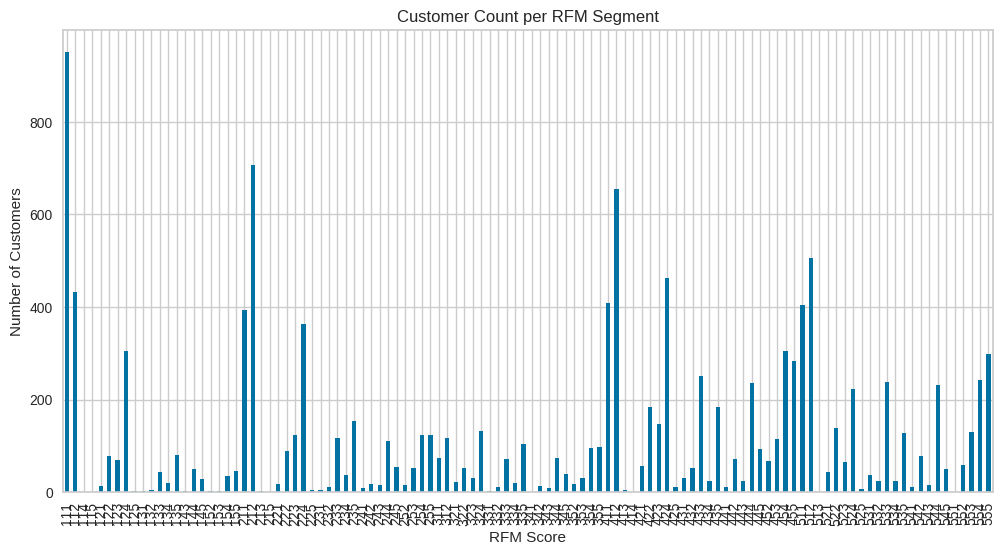

In [ ]:
rfm['rfm_score'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Customer Count per RFM Segment')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.show()

###4.2.3 Input Benchmark

In [ ]:
# Google Sheet URL and conversion to CSV export link
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1xbxOTeE6ihnp6iBA_yz1mJimR-z2sAEDQNkQ4crh92E/edit?gid=884117664#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit?gid=', '/export?format=csv&gid=')

# Load RFM segments scoring benchmark from Google Sheets
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

# Convert rfm_score column to string type for matching/comparison
rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)
rfm_segments

,rfm_score,segment,Activity,Actionable
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,554,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,544,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
...,...,...,...,...
120,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
121,121,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
122,131,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
123,141,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."


###4.2.4 Merge RFM

In [ ]:
# Merge RFM scores with segment labels and actionable insights
rfm_final = rfm.merge(rfm_segments, how='left', on='rfm_score')
rfm_final

,account_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,100000006,26,1,25000.0,1,1,2,1,1,2,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
1,100000038,25,5,45000.0,1,5,4,1,5,4,154,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
2,100000382,18,6,103980.0,4,5,5,4,5,5,455,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,100000612,14,6,154980.0,5,5,5,5,5,5,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,100000757,17,3,75000.0,4,3,5,4,3,5,435,Loyal Customers,Spend good money with us often. Responsive to ...,Upsell higher value products. Ask for reviews....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12353,101059900,21,1,15000.0,2,1,1,2,1,1,211,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
12354,101059915,19,1,20000.0,3,1,2,3,1,2,312,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr..."
12355,101059935,21,1,20000.0,2,1,2,2,1,2,212,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
12356,101059941,17,2,40000.0,4,2,4,4,2,4,424,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"


###4.2.5 Count Segment, Actionable, Activity

In [ ]:
# Count of customers per segment
rfm_final['segment'].value_counts()

,count
segment,
Recent Customers,2291
Hibernating,1670
At Risk,1556
Champions,1504
Potential Loyalist,1483
Lost,1398
Promising,956
Loyal Customers,849
Customers Needing Attention,359


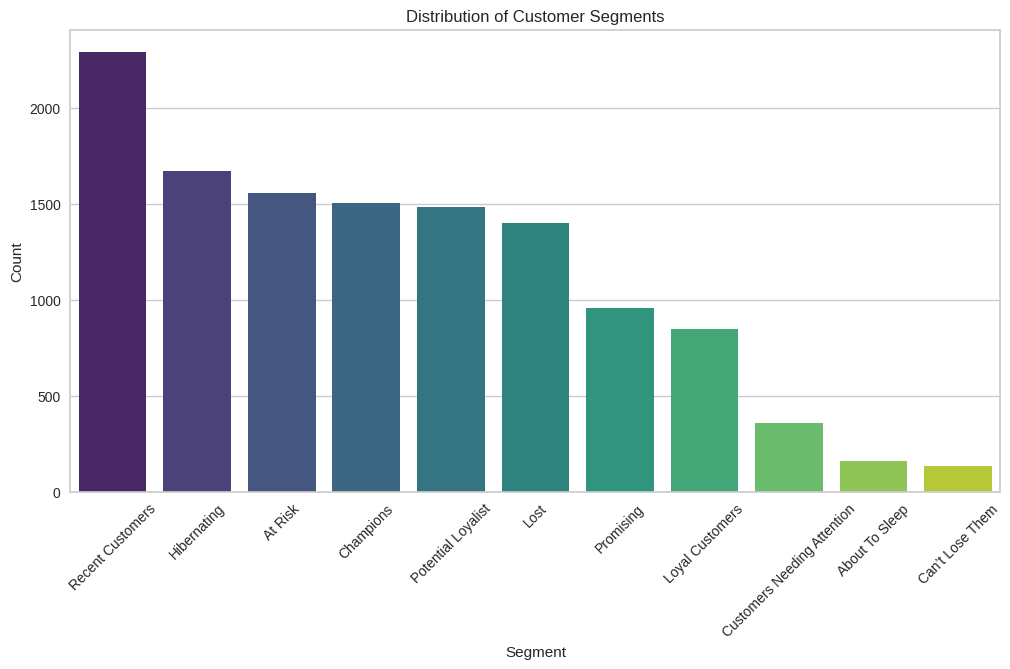

In [ ]:
# Count of each segment
segment_counts = rfm_final['segment'].value_counts()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count of customers per Actionable
rfm_final['Actionable'].value_counts()

,count
Actionable,
"Provide on-boarding support, give them early success, start building relationship.",2291
Offer other relevant products and special discounts. Recreate brand value.,1670
"Send personalized emails to reconnect, offer renewals, provide helpful resources.",1556
Reward them. Can be early adopters for new products. Will promote your brand.,1504
"Offer membership / loyalty program, recommend other products.",1483
"Revive interest with reach out campaign, ignore otherwise.",1398
"Create brand awareness, offer free trials",956
Upsell higher value products. Ask for reviews. Engage them.,849
"Make limited time offers, Recommend based on past purchases. Reactivate them.",359


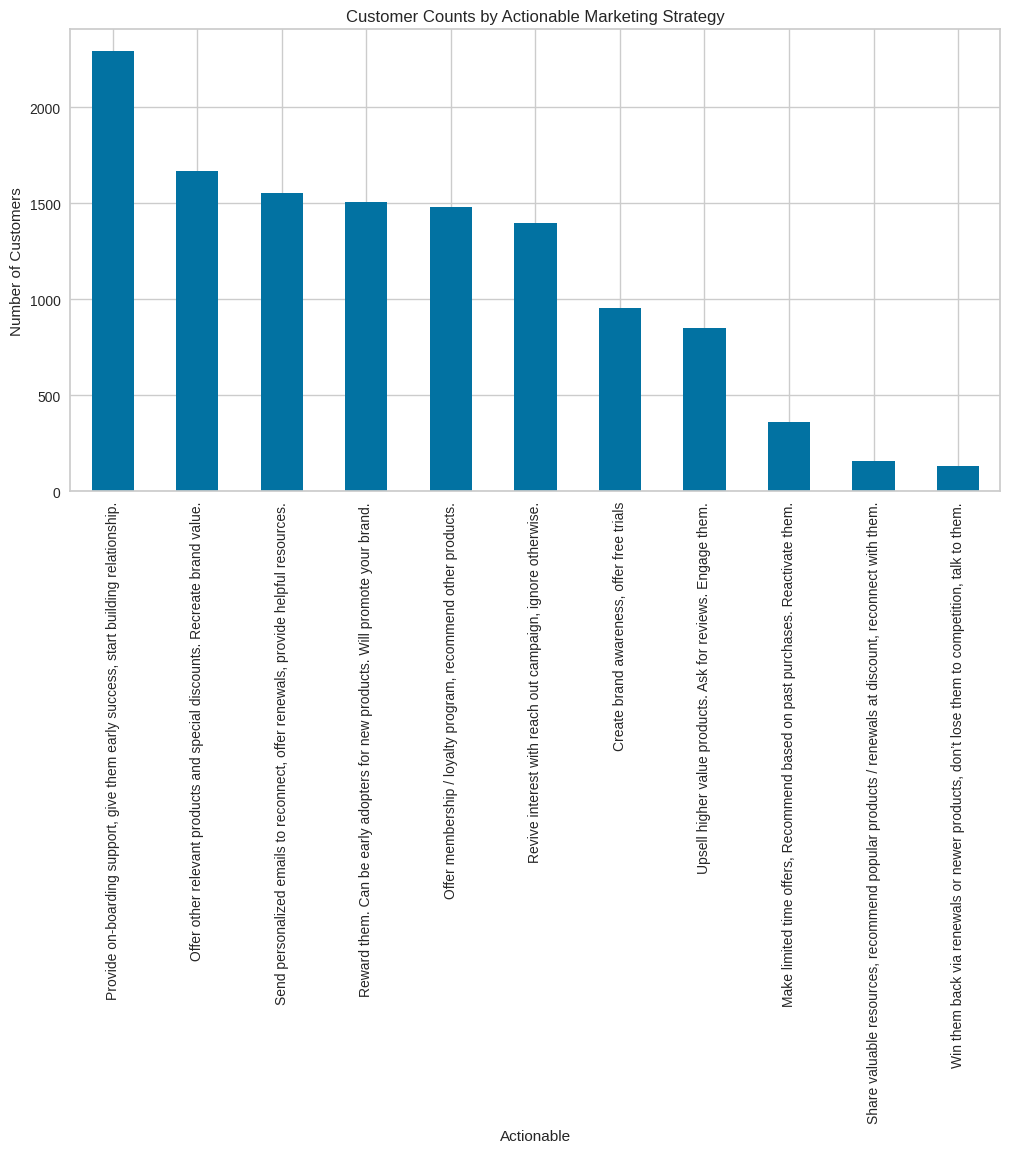

In [ ]:
rfm_final['Actionable'].value_counts().plot(kind='bar', figsize=(12,6), title='Customer Counts by Actionable Marketing Strategy')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Count of customers per Actionable
rfm_final['Activity'].value_counts()

,count
Activity,
"Bought most recently, but not often.",2291
"Last purchase was long back, low spenders and low number of orders.",1670
Spent big money and purchased often. But long time ago. Need to bring them back!,1556
"Bought recently, buy often and spend the most!",1504
"Recent customers, but spent a good amount and bought more than once.",1483
"Lowest recency, frequency and monetary scores.",1398
"Recent shoppers, but haven’t spent much.",956
Spend good money with us often. Responsive to promotions.,849
"Above average recency, frequency and monetary values. May not have bought very recently though.",359


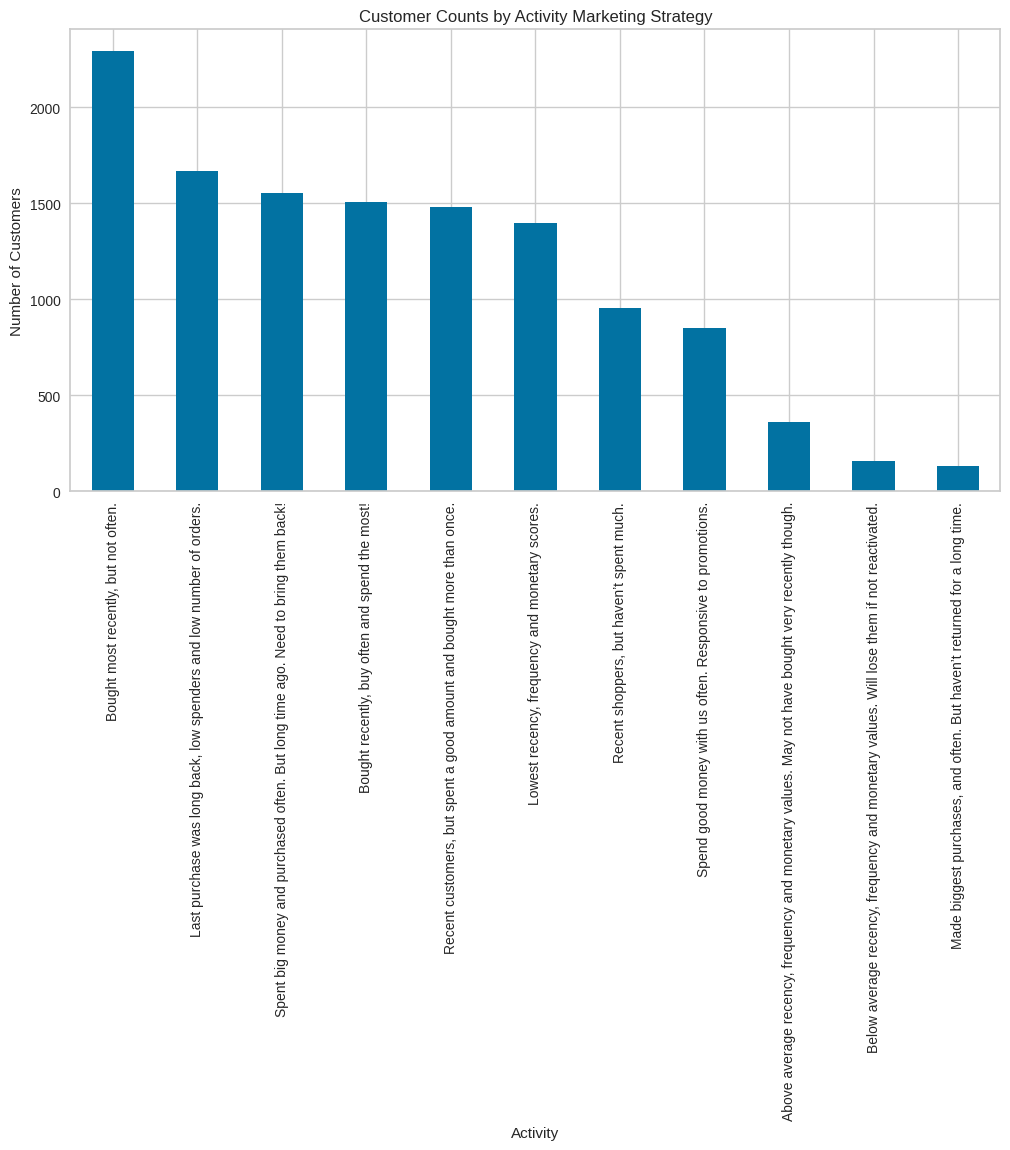

In [ ]:
rfm_final['Activity'].value_counts().plot(kind='bar', figsize=(12,6), title='Customer Counts by Activity Marketing Strategy')
plt.ylabel('Number of Customers')
plt.show()

###4.2.6 Group by Segment and mean

In [ ]:
# Group by segment and calculate mean of RFM variables
rfm_final.groupby(['segment'])[['recency', 'frequency', 'monetary']].mean()

,recency,frequency,monetary
segment,,,
About To Sleep,19.225000,1.275000,20986.437500
At Risk,22.520566,3.417095,49014.260925
Can’t Lose Them,24.833333,4.977273,56053.484848
Champions,15.770612,5.989362,57417.061170
Customers Needing Attention,16.832869,2.724234,49445.181058
Hibernating,21.342515,1.440719,21452.479042
Lost,40.365522,0.492132,9346.924177
Loyal Customers,18.239105,4.215548,52084.617197
Potential Loyalist,16.492920,3.710722,27038.792987


###4.2.7 Select Relevant column and Merge

In [ ]:
# Select relevant columns from rfm_final and merge with original dataset on account_id
rfm_complete = rfm_final[['account_id', 'segment', 'Activity', 'Actionable']].merge(df_customers_dc, how='left', on='account_id')
rfm_complete

,account_id,segment,Activity,Actionable,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,...,month_since_last_sales,count_direct_promo_L12M,birth_date,Age,total_sales,has_sales,profit,Gender,year_of_birth,generation
0,100000006,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor...",X,A,91,0,25000.0,1,...,26,5,1996-11-03,27.0,25000.0,Yes,600.00,Male,1996,Gen-Z
1,100000038,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ...",X,A,69,0,9000.0,5,...,25,10,1971-04-24,52.0,45000.0,Yes,1080.00,Male,1971,Millennial
2,100000382,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...,X,A,123,1,17330.0,6,...,18,6,1953-01-16,70.0,103980.0,Yes,2495.52,Female,1953,Gen-X
3,100000612,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...,X,A,84,1,25830.0,6,...,14,7,1997-06-07,26.0,154980.0,Yes,3719.52,Female,1997,Gen-Alpha
4,100000757,Loyal Customers,Spend good money with us often. Responsive to ...,Upsell higher value products. Ask for reviews....,X,A,40,0,25000.0,3,...,17,5,1989-09-13,34.0,75000.0,Yes,1800.00,Male,1989,Gen-Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12353,101059900,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...,Z,E,21,1,15000.0,1,...,21,3,1970-05-27,53.0,15000.0,Yes,360.00,Female,1970,Millennial
12354,101059915,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr...",Z,E,19,0,20000.0,1,...,19,4,1952-03-04,71.0,20000.0,Yes,480.00,Male,1952,Gen-X
12355,101059935,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...,Z,E,21,0,20000.0,1,...,21,4,1981-10-23,42.0,20000.0,Yes,480.00,Male,1981,Gen-Z
12356,101059941,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials",Z,E,17,0,20000.0,2,...,17,6,1975-07-21,48.0,40000.0,Yes,960.00,Male,1975,Millennial


###4.2.8 Groupby Numerical

In [ ]:
# Then you can groupby and choose which column you want to interpret
numerical_column = rfm_complete.select_dtypes(include='number').columns

rfm_complete.groupby('segment')[numerical_column].mean()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,Age,total_sales,profit,year_of_birth
segment,,,,,,,,,,,
About To Sleep,62.381250,0.525000,18923.937500,1.275000,19209.375000,19.225000,4.906250,56.175000,20986.437500,503.674500,1966.768750
At Risk,66.755784,0.531491,16980.829049,3.417095,17642.030848,22.520566,5.724293,56.835476,49014.260925,1176.342262,1966.073907
Can’t Lose Them,92.121212,0.568182,12897.954545,4.977273,13257.575758,24.833333,5.742424,59.454545,56053.484848,1345.283636,1963.500000
Champions,75.518617,0.567154,10217.593085,5.989362,10805.398936,15.770612,6.126995,58.184840,57417.061170,1378.009468,1964.707447
Customers Needing Attention,64.924791,0.498607,18874.568245,2.724234,20181.058496,16.832869,6.052925,57.217270,49445.181058,1186.684345,1965.682451
Hibernating,51.567066,0.520958,16629.676647,1.440719,16764.071856,21.342515,4.313174,55.773653,21452.479042,514.859497,1967.125749
Lost,63.454220,0.536481,9251.788269,0.492132,17170.958512,40.365522,3.674535,54.986409,9346.924177,224.326180,1967.938484
Loyal Customers,75.570082,0.527680,13467.762073,4.215548,14416.961131,18.239105,6.103651,59.815077,52084.617197,1250.030813,1963.111896
Potential Loyalist,80.340526,0.561025,8235.421443,3.710722,8545.057316,16.492920,5.406608,60.952124,27038.792987,648.931032,1961.956170


###4.2.9 3D Scatter Final

In [ ]:
# Create 3D scatter plot with correct RFM columns and color by segment
fig = px.scatter_3d(
    rfm_final,
    x='recency',
    y='frequency',   # Correct frequency column name
    z='monetary',    # Correct monetary column name
    color='segment',
    title='RFM Plot v2',
    size_max=10
)

fig.show()

##4.3 Identify Segment

In [ ]:
# Calculate additional metrics
rfm_complete['has_no_sales'] = (rfm_complete['total_sales'] == 0).astype(int)

# Group by segment and calculate required metrics
segment_metrics = rfm_complete.groupby('segment').agg({
    'total_sales': 'mean',  # Average sales per client
    'cnt_sales_L36M': 'mean',  # Average transaction frequency per client
    'total_sales': 'sum',  # Total revenue generated
    'has_no_sales': 'mean'  # Proportion of clients with no sales
}).reset_index()

# Rename columns for clarity
segment_metrics.rename(columns={
    'total_sales': 'avg_sales_per_client',
    'cnt_sales_L36M': 'avg_transaction_frequency',
    'total_sales': 'total_revenue',
    'has_no_sales': 'proportion_no_sales'
}, inplace=True)

# Display the dataframe to verify
print(segment_metrics)

                        segment  total_revenue  avg_transaction_frequency  \
0                About To Sleep      3357830.0                   1.275000   
1                       At Risk     76266190.0                   3.417095   
2               Can’t Lose Them      7399060.0                   4.977273   
3                     Champions     86355260.0                   5.989362   
4   Customers Needing Attention     17750820.0                   2.724234   
5                   Hibernating     35825640.0                   1.440719   
6                          Lost     13067000.0                   0.492132   
7               Loyal Customers     44219840.0                   4.215548   
8            Potential Loyalist     40098530.0                   3.710722   
9                     Promising     35339060.0                   1.992678   
10             Recent Customers     42924630.0                   1.105194   

    proportion_no_sales  
0              0.000000  
1              0.000000

In [ ]:
# Create flag for clients with no sales
rfm_final['has_no_sales'] = rfm_final['monetary'].apply(lambda x: 1 if x == 0 else 0)

# Aggregate metrics per segment
segment_metrics = rfm_final.groupby('segment').agg(
    avg_monetary=('monetary', 'mean'),
    avg_frequency=('frequency', 'mean'),
    total_revenue=('monetary', 'sum'),
    dormancy_rate=('has_no_sales', 'mean')
).sort_values(by='total_revenue', ascending=False)

print(segment_metrics)

                             avg_monetary  avg_frequency  total_revenue  \
segment                                                                   
Champions                    57417.061170       5.989362     86355260.0   
At Risk                      49014.260925       3.417095     76266190.0   
Loyal Customers              52084.617197       4.215548     44219840.0   
Recent Customers             18736.198167       1.105194     42924630.0   
Potential Loyalist           27038.792987       3.710722     40098530.0   
Hibernating                  21452.479042       1.440719     35825640.0   
Promising                    36965.543933       1.992678     35339060.0   
Customers Needing Attention  49445.181058       2.724234     17750820.0   
Lost                          9346.924177       0.492132     13067000.0   
Can’t Lose Them              56053.484848       4.977273      7399060.0   
About To Sleep               20986.437500       1.275000      3357830.0   

                        